<a href="https://colab.research.google.com/github/manashpratim/Personality-Type-Classification/blob/master/Personaltity_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Downloading the Dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D"\
      -O "/tmp/mbti.zip"

--2019-06-27 01:09:22--  https://storage.googleapis.com/kaggle-datasets/2637/4381/mbti_1.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561827680&Signature=FuZVxTRJq8XHy3Zs2m7Khiac2S2SuYLxNd8fTgqmpFqGqlwwQrQEnBk4bamd6CA1cTSToRFwn8bAqPEatCbaSBmqdSX7K3FcTUid9LEkwQZNq7Yxj0NcV3trg%2FXPMXbtvwhK34wq2UgDmH0hXyOo8kcha6t%2Fc1p87jajs%2BYqJT4NLdbBxlY4n%2FOsZTkfP3%2FNBuBXDdTIjR%2BKeKRLTz4LDB%2BItuMImn%2BNHavJv%2Fw0u1mYg5yrS%2FV2JM%2F%2FHVDbApthmEo5awR5U1H2VwEe6NZNKEaHLz21wVNt3WC0OTHdF7ggAv6X4DQzymh2xhkvsuh0c5HTdJKfwGKwYDTZb14X7w%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26387746 (25M) [application/octet-stream]
Saving to: ‘/tmp/mbti.zip’

/tmp/mbti.zip       100%[===================>]  25.17M  74.9MB/s    in 0.3s    

2019-06-27 01:09:22 (74.9 MB/s) - ‘/t

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/mbti.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/mbti')
zip_ref.close()

In [255]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',string) #remove url
  clean=re.sub('[\n]',' ',clean) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean.lower()) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/tmp/mbti/mbti_1.csv')

In [16]:
df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [0]:
#Cleaning the data 
data=[]
for i in range(len(df)):
  l=[]
  l.append(df['type'][i])
  l.append(clean_text(df['posts'][i]))
  data.append(l)

In [0]:
#Suffling the data and splitting the data into train and test sets (90:10)
import random
suffled_set=random.sample(data,len(data))
train_len=int(len(suffled_set)*0.9)
train=suffled_set[:train_len]
test=suffled_set[train_len:]

In [258]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train))
print('No. of Test Examples: ',len(test))
print('No. of Classes: ',df['type'].nunique())

Length of the Data:  8675
No. of Training Examples:  7807
No. of Test Examples:  868
No. of Classes:  16


In [0]:
#Separating the personality types (labels) and the posts
train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
labels=[]
sentences=[]

for i in range(len(train)):
  train_labels.append(train[i][0])
  train_sentences.append(train[i][1])

for i in range(len(test)):
  test_labels.append(test[i][0])
  test_sentences.append(test[i][1])

for i in range(len(suffled_set)):
  labels.append(suffled_set[i][0])
  sentences.append(suffled_set[i][1])

In [185]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

embedding_dim = 300
max_length = 900
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=14999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Label Encoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels=le.transform(train_labels) 
le.fit(test_labels)
test_labels=le.transform(test_labels) 
le.fit(labels)
labels=le.transform(labels) 

train_labels=np.expand_dims(train_labels, axis=1)
test_labels=np.expand_dims(test_labels, axis=1)
labels=np.expand_dims(labels, axis=1)


Original Size of Vocabulary:  96937
New Size of Vocabulary:  15000


In [186]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Test Data: ',test_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Test Labels: ',test_labels.shape)
print('Dimension of Data: ',padded.shape)
print('Dimension of Labels: ',labels.shape)

Dimension of Training Data:  (7807, 900)
Dimension of Test Data:  (868, 900)
Dimension of Training Labels:  (7807, 1)
Dimension of Test Labels:  (868, 1)
Dimension of Data:  (8675, 900)
Dimension of Labels:  (8675, 1)


In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Unzipping the fasttext pretrained model from Google Drive
import os
import zipfile

local_zip='/content/drive/My Drive/crawl-300d-2M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/crawl-300d-2M.vec')
zip_ref.close()

In [0]:
# Loading the pretrained vectors
embeddings_index = {}
import numpy as np
with open('/content/drive/My Drive/crawl-300d-2M.vec/crawl-300d-2M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [0]:
# Creating an embedding matrix that contains the vectors of the words in the MBTI dataset
embeddings_matrix = np.zeros((vocab_len+2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
        

In [95]:
#embeddings_matrix=np.delete(embeddings_matrix, 1, 0)
embeddings_matrix.shape

(15000, 300)

In [39]:
print('Shape of embeddings matrix: ',embeddings_matrix.shape)

Shape of embeddings matrix:  (15000, 300)


In [0]:
#from keras.regularizers import l2
#Building the CNN Model
model_conv = tf.keras.Sequential([
    #tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [225]:
model_conv.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 900, 300)          4500000   
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 898, 64)           57664     
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 449, 64)           0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 447, 128)          24704     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 223, 128)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 223, 128)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 28544)           

In [226]:
model_conv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history=model_conv.fit(train_padded, train_labels, epochs=num_epochs, validation_split=0.2)

Train on 6245 samples, validate on 1562 samples
Epoch 1/20
6245/6245 [==============================] - 4s 666us/sample - loss: 2.1500 - acc: 0.2876 - val_loss: 1.7867 - val_acc: 0.4629
Epoch 2/20
6245/6245 [==============================] - 3s 434us/sample - loss: 1.5041 - acc: 0.5572 - val_loss: 1.5750 - val_acc: 0.5615
Epoch 3/20
6245/6245 [==============================] - 3s 437us/sample - loss: 0.9098 - acc: 0.7193 - val_loss: 1.7912 - val_acc: 0.5359
Epoch 4/20
6245/6245 [==============================] - 3s 435us/sample - loss: 0.4976 - acc: 0.8434 - val_loss: 2.3056 - val_acc: 0.5301
Epoch 5/20
6245/6245 [==============================] - 3s 436us/sample - loss: 0.3090 - acc: 0.9026 - val_loss: 2.6846 - val_acc: 0.5314
Epoch 6/20
6245/6245 [==============================] - 3s 436us/sample - loss: 0.1859 - acc: 0.9380 - val_loss: 3.4020 - val_acc: 0.5250
Epoch 7/20
6245/6245 [==============================] - 3s 433us/sample - loss: 0.1470 - acc: 0.9532 - val_loss: 3.7062 - va

<Figure size 432x288 with 0 Axes>

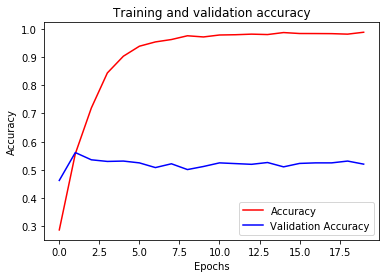

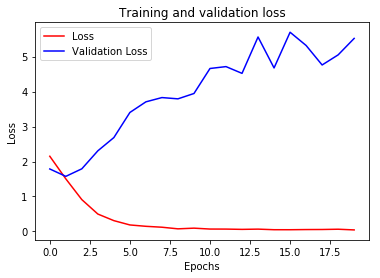

<Figure size 432x288 with 0 Axes>

In [227]:
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

# **We can see that while the training  accuracy is close to 100%, validation accuracy is just around 50%. Lets find out why!**

In [228]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

868/868 - 0s - loss: 5.8859 - acc: 0.5173
Test accuracy: 0.5172811


In [0]:
pred_prob_test_labels=model_conv.predict(test_padded)

pred_test_labels=[]
for i in range(len(pred_prob_test_labels)):
  pred_test_labels.append(np.argmax(pred_prob_test_labels[i]))  

In [0]:
pred_test_labels=np.array(pred_test_labels)
true_test_labels=np.squeeze(test_labels, axis=1)

In [231]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(true_test_labels, pred_test_labels)
print('Cohen Score: ',cohen_score)

Cohen Score:  0.43641516831210625


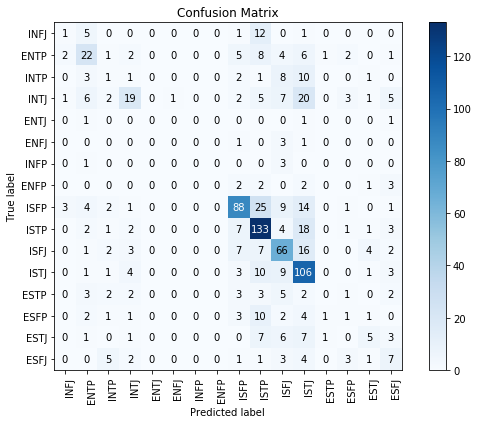

In [232]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=df['type'].unique(),
                      title='Confusion Matrix')


Text(0.5, 1.0, 'Personality Types Distribution')

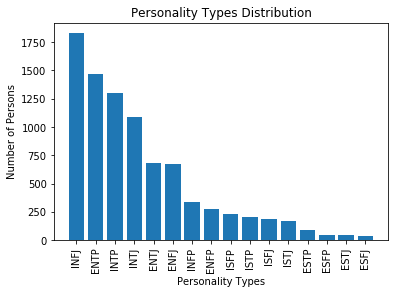

In [105]:
%matplotlib inline

y=df['type'].value_counts()
x=df['type'].unique()
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Personality Types')
plt.ylabel('Number of Persons')
plt.title('Personality Types Distribution')

# **It is apparent from the graph above that there is severe class imbalance problem with the dataset.**

**Let us try a sampling technique to remove class imbalance**

In [199]:
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(train_padded, train_labels)
print(X_sm.shape, y_sm.shape)

(9432, 900) (9432,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [239]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(train_labels) ,np.squeeze(train_labels, axis=1))
history= model_conv.fit(X_sm, y_sm,
                    epochs=20,
                    verbose=2,
                    validation_split=0.2)

Train on 7545 samples, validate on 1887 samples
Epoch 1/20
7545/7545 - 3s - loss: 0.0409 - acc: 0.9882 - val_loss: 23.8787 - val_acc: 0.0689
Epoch 2/20
7545/7545 - 3s - loss: 0.0435 - acc: 0.9882 - val_loss: 23.6471 - val_acc: 0.0636
Epoch 3/20
7545/7545 - 3s - loss: 0.0387 - acc: 0.9885 - val_loss: 26.3584 - val_acc: 0.0636
Epoch 4/20
7545/7545 - 3s - loss: 0.0345 - acc: 0.9894 - val_loss: 27.7311 - val_acc: 0.0700
Epoch 5/20
7545/7545 - 3s - loss: 0.0444 - acc: 0.9874 - val_loss: 26.6372 - val_acc: 0.0662
Epoch 6/20
7545/7545 - 3s - loss: 0.0336 - acc: 0.9905 - val_loss: 29.6547 - val_acc: 0.0678
Epoch 7/20
7545/7545 - 3s - loss: 0.0425 - acc: 0.9886 - val_loss: 31.2485 - val_acc: 0.0737
Epoch 8/20
7545/7545 - 3s - loss: 0.0343 - acc: 0.9890 - val_loss: 24.8995 - val_acc: 0.0731
Epoch 9/20
7545/7545 - 3s - loss: 0.0548 - acc: 0.9841 - val_loss: 29.4350 - val_acc: 0.0705
Epoch 10/20
7545/7545 - 3s - loss: 0.0325 - acc: 0.9901 - val_loss: 26.7302 - val_acc: 0.0715
Epoch 11/20
7545/7545

In [241]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

868/868 - 0s - loss: 7.9201 - acc: 0.5415
Test accuracy: 0.54147464


**We can see that after using a sampling technique, the validation accuracy was abysmal. However, the test accuracy improved by around 2.5%**

**Let's try some traditional ML algorithms**

# **Multinomial Naive Bayes Classifier**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])


In [261]:
pipeline.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7f5539238488>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
pred=pipeline.predict(test_sentences)

In [264]:
from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(test_labels,pred))

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.20161290322580644


# **Support Vector Machines**

In [0]:
from sklearn.svm import SVC
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',SVC())
                   ])


In [273]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)
from sklearn.metrics import accuracy_score
print('Test Accuracy using Support Vector Mchines: ',accuracy_score(test_labels,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy using Support Vector Mchines:  0.20161290322580644


# **Random Forests**

In [0]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',RandomForestClassifier(n_estimators=800))
                   ])

In [281]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)
from sklearn.metrics import accuracy_score
print('Test Accuracy using Random Forest Classifier: ',accuracy_score(test_labels,pred))

Test Accuracy using Random Forest Classifier:  0.3029953917050691
